In [33]:
# !pip install ipython-sql

In [5]:
%load_ext sql

In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
%sql SELECT * FROM KST20259.HISTORICAL_PRODUCT_DEMAND LIMIT 5;

 * ibm_db_sa://kst20259:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Product_Code,Warehouse,Product_Category,Date,Order_Demand
Product_0993,Whse_J,Category_028,2012/7/27,100
Product_0979,Whse_J,Category_028,2012/1/19,500
Product_0979,Whse_J,Category_028,2012/2/3,500
Product_0979,Whse_J,Category_028,2012/2/9,500
Product_0979,Whse_J,Category_028,2012/3/2,500


In [16]:
import ibm_db_dbi
import ibm_db


In [25]:
# The code was removed by Watson Studio for sharing.

In [26]:
import pandas as pd

df = pd.read_sql_query('SELECT * FROM KST20259.HISTORICAL_PRODUCT_DEMAND', connDbi)

In [29]:
ibm_db.close(conn)

True

In [44]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [45]:
print(df.dtypes)

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object


In [51]:
df.dropna(inplace=True)

In [54]:
df.isnull().values.any()

False

In [59]:
df.loc[df['Date'] == 'NA'].head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
45460,Product_1461,Whse_A,Category_019,NA,10000
456373,Product_1636,Whse_A,Category_019,NA,100
456374,Product_1461,Whse_A,Category_019,NA,300
456375,Product_1464,Whse_A,Category_019,NA,300
456376,Product_1388,Whse_A,Category_019,NA,200


In [60]:
df = df.drop(df[df.Date == 'NA'].index)

In [61]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [62]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year
0,Product_0993,Whse_J,Category_028,2012-07-27,100,2012
1,Product_0979,Whse_J,Category_028,2012-01-19,500,2012
2,Product_0979,Whse_J,Category_028,2012-02-03,500,2012
3,Product_0979,Whse_J,Category_028,2012-02-09,500,2012
4,Product_0979,Whse_J,Category_028,2012-03-02,500,2012


In [68]:
df2 = df[['Year', 'Order_Demand']].groupby(['Year'], as_index=False).count()

In [69]:
df2.tail()

,Year,Order_Demand
2,2013,218298
3,2014,216404
4,2015,209661
5,2016,188645
6,2017,53


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

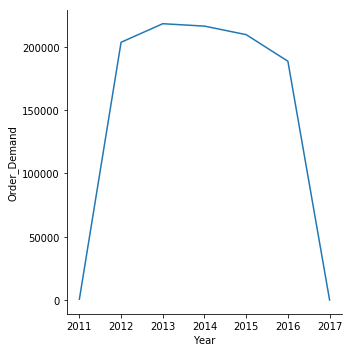

In [77]:
sns.relplot(x="Year", y="Order_Demand", ci=None, kind="line", data=df2)

In [108]:
df3 = df[['Date', 'Product_Category', 'Order_Demand']].groupby(['Date', 'Product_Category'], as_index=False).count()

In [109]:
df3.sort_values(by=['Order_Demand'], ascending=False).head()

,Date,Product_Category,Order_Demand
11766,2013-10-25,Category_019,1311
11257,2013-09-27,Category_019,1292
11814,2013-10-28,Category_019,1213
11861,2013-10-30,Category_019,1198
11786,2013-10-26,Category_019,855


In [110]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Year'] = df3['Date'].dt.year

In [111]:
df3.head()

,Date,Product_Category,Order_Demand,Year
0,2011-01-08,Category_006,1,2011
1,2011-05-31,Category_003,1,2011
2,2011-06-24,Category_019,2,2011
3,2011-09-02,Category_019,1,2011
4,2011-09-27,Category_001,2,2011


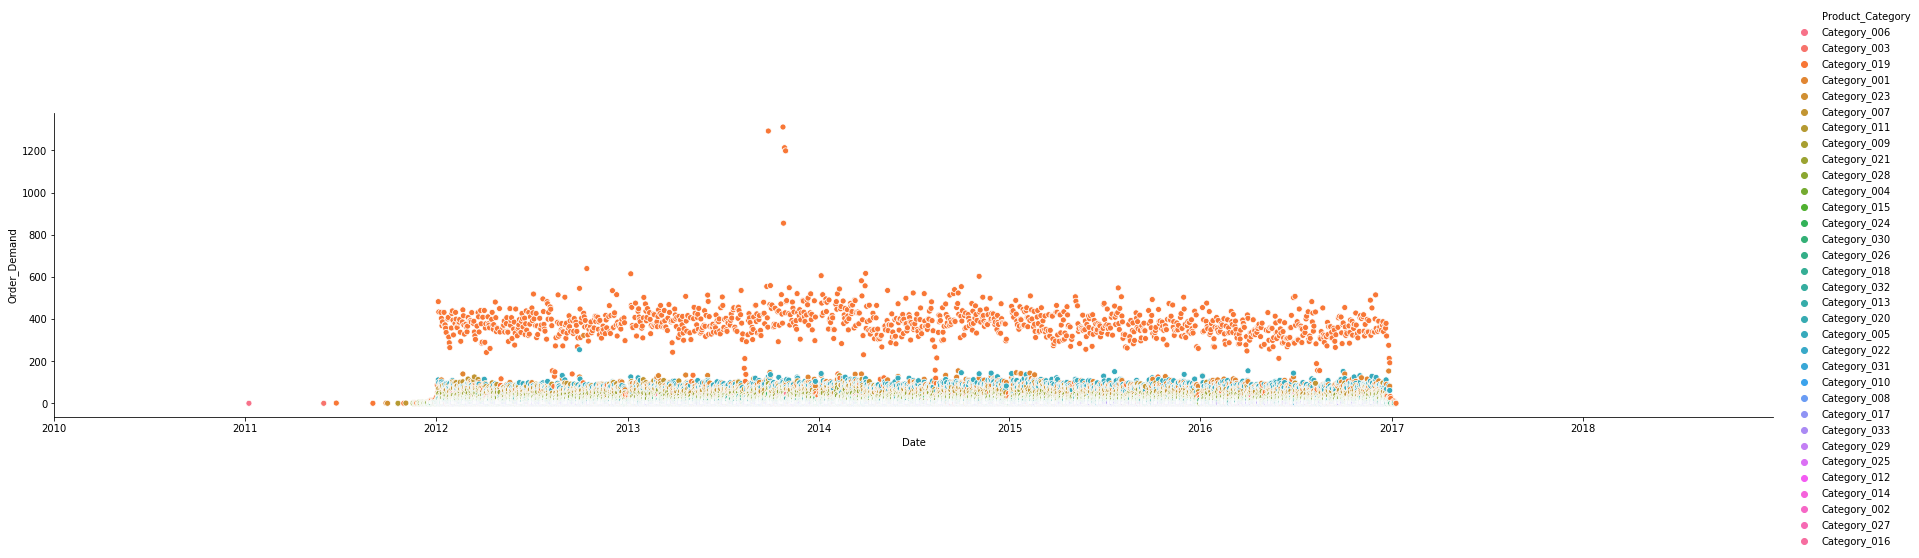

In [130]:
import datetime
format_str = '%Y-%m-%d' # The format
sns.relplot(x="Date", y="Order_Demand", hue="Product_Category", data=df3, height=5, aspect=5).set(xlim=(datetime.datetime.strptime('2010-01-01', format_str), datetime.datetime.strptime('2018-12-31', format_str)))
